## 1. IMPORTING ALL REQUIRE LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.filterwarnings("ignore")

# Airline libraries
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from feature_engine.encoding import RareLabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Date_of_journey Libraries
from feature_engine.datetime import DatetimeFeatures
from sklearn.preprocessing import MinMaxScaler

# Source Destination Libraries
from feature_engine.encoding import MeanEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion

# Arrival Departure Time Libraries
from feature_engine.encoding import CountFrequencyEncoder

# Duration Libraries
from feature_engine.outliers import Winsorizer

# Column Transformer Library
from sklearn.compose import ColumnTransformer

# Feature Selection Libraries
from sklearn.ensemble import RandomForestRegressor
from feature_engine.selection import SelectBySingleFeaturePerformance

sklearn.set_config(transform_output='pandas')
pd.set_option("display.max_columns", None)

## 2. IMPORTING DATASET

In [4]:
path = r"../Data/cleaned_dataset.csv"
train = pd.read_csv(path)
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,class_,price
0,Indigo,2019-03-24,Banglore,New Delhi,22:20:00,01:10:00,170,0.0,No Info,Economy,3897
1,Air India,2019-05-01,Kolkata,Banglore,05:50:00,13:15:00,445,2.0,No Info,Economy,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,09:25:00,04:25:00,1140,2.0,No Info,Economy,13882
3,Indigo,2019-05-12,Kolkata,Banglore,18:05:00,23:30:00,325,1.0,No Info,Economy,6218
4,Indigo,2019-03-01,Banglore,New Delhi,16:50:00,21:35:00,285,1.0,No Info,Economy,13302


In [10]:
path = r"../Data/train.csv"
train = pd.read_csv(path)
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,class_,price
0,Indigo,2019-05-09,Delhi,Cochin,06:50:00,16:10:00,560,1.0,No Info,Economy,6442
1,Air India,2019-04-03,Mumbai,Hyderabad,06:20:00,07:40:00,80,0.0,No Info,Economy,3100
2,Spicejet,2019-05-15,Kolkata,Banglore,11:15:00,18:30:00,435,1.0,No Info,Economy,8844
3,Jet Airways,2019-06-09,Delhi,Cochin,19:45:00,12:35:00,1010,1.0,In-flight meal not included,Economy,10577
4,Jet Airways,2019-06-18,Delhi,Cochin,09:50:00,13:05:00,195,0.0,No Info,Economy,9564


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          6695 non-null   object 
 1   date_of_journey  6695 non-null   object 
 2   source           6695 non-null   object 
 3   destination      6695 non-null   object 
 4   dep_time         6695 non-null   object 
 5   arrival_time     6695 non-null   object 
 6   duration         6695 non-null   int64  
 7   total_stops      6695 non-null   float64
 8   additional_info  6695 non-null   object 
 9   class_           6695 non-null   object 
 10  price            6695 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 575.5+ KB


## 3. DATA SPLITTING INTO X AND Y

In [12]:
X_Train = train.drop(['price'], axis = 1)
Y_Train = train['price']

In [13]:
print("TRAIN SHAPE",train.shape)
print("X-TRAIN SHAPE",X_Train.shape)
print("Y-TRAIN SHAPE",Y_Train.shape)

TRAIN SHAPE (6695, 11)
X-TRAIN SHAPE (6695, 10)
Y-TRAIN SHAPE (6695,)


## 4. TRANSFORMATION OPERATIONS

### 4.1 AIRLINE COLUMN

In [14]:
train['airline']

0                  Indigo
1               Air India
2                Spicejet
3             Jet Airways
4             Jet Airways
              ...        
6690    Multiple Carriers
6691             Spicejet
6692          Jet Airways
6693               Indigo
6694          Jet Airways
Name: airline, Length: 6695, dtype: object

While performing EDA on the airline column,we get to know that there are so many rare unique values that are present in the airline column that have very low frequency, so while performing feature engineering, we need to consider this case.

In [15]:
train['airline'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6695 entries, 0 to 6694
Series name: airline
Non-Null Count  Dtype 
--------------  ----- 
6695 non-null   object
dtypes: object(1)
memory usage: 52.4+ KB


In [16]:
train['airline'].value_counts(normalize = True)

airline
Jet Airways          0.354593
Indigo               0.194175
Air India            0.163555
Multiple Carriers    0.117849
Spicejet             0.079313
Vistara              0.043465
Air Asia             0.029276
Goair                0.017774
Name: proportion, dtype: float64

In [17]:
Airline_Transformer = Pipeline(steps=[
    ("Imputer", SimpleImputer(strategy="most_frequent")),
    ("Grouper", RareLabelEncoder(tol=0.1,
                                 n_categories = 2,
                                 replace_with = "Other"))
])
Airline_Transformer.fit_transform(X_Train.loc[:, ['airline']]).value_counts(normalize = True)

airline          
Jet Airways          0.354593
Indigo               0.194175
Other                0.169828
Air India            0.163555
Multiple Carriers    0.117849
Name: proportion, dtype: float64

#### FINAL

In [19]:
Airline_Transformer = Pipeline(steps=[
    ("Imputer", SimpleImputer(strategy="most_frequent")),
    ("Grouper", RareLabelEncoder(tol=0.1,
                                 n_categories = 2,
                                 replace_with = "Other")),
     ("OneHotEncoder", OneHotEncoder(handle_unknown='ignore',
                                    sparse_output=False))
])
Airline_Transformer.fit_transform(X_Train.loc[:, ['airline']])

,airline_Air India,airline_Indigo,airline_Jet Airways,airline_Multiple Carriers,airline_Other
0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
6690,0.0,0.0,0.0,1.0,0.0
6691,0.0,0.0,0.0,0.0,1.0
6692,0.0,0.0,1.0,0.0,0.0
6693,0.0,1.0,0.0,0.0,0.0


### 4.2 DATE OF JOURNEY COLUMN

In [20]:
train['date_of_journey']

0       2019-05-09
1       2019-04-03
2       2019-05-15
3       2019-06-09
4       2019-06-18
           ...    
6690    2019-03-03
6691    2019-05-27
6692    2019-06-06
6693    2019-04-21
6694    2019-05-01
Name: date_of_journey, Length: 6695, dtype: object

The data that is present in a date_of_journey column has a format of datetime so we can abstract all the information like month, year, week, day_of_week, day_of_year, etc.

In [21]:

DOJ_Transformer = Pipeline(steps=[
    ("DateTime", DatetimeFeatures(features_to_extract=['month', 'week', 'day_of_week', 'day_of_month'],
                                 yearfirst=True,
                                format='mixed'))
])
DOJ_Transformer.fit_transform(X_Train.loc[:, ['date_of_journey']])

,date_of_journey_month,date_of_journey_week,date_of_journey_day_of_week,date_of_journey_day_of_month
0,5,19,3,9
1,4,14,2,3
2,5,20,2,15
3,6,23,6,9
4,6,25,1,18
...,...,...,...,...
6690,3,9,6,3
6691,5,22,0,27
6692,6,23,3,6
6693,4,16,6,21


As the values present inside the columns are present in different ranges, we need to scale them in a common range. and for that we will use MinMaxScalar.

#### FINAL

In [22]:
DOJ_Transformer = Pipeline(steps=[
    ("DateTime", DatetimeFeatures(features_to_extract=['month', 'week', 'day_of_week', 'day_of_month'],
                                 yearfirst=True,
                                format='mixed')),
    ("Scalar", MinMaxScaler())
])
DOJ_Transformer.fit_transform(X_Train.loc[:, ['date_of_journey']])

,date_of_journey_month,date_of_journey_week,date_of_journey_day_of_week,date_of_journey_day_of_month
0,0.666667,0.588235,0.500000,0.307692
1,0.333333,0.294118,0.333333,0.076923
2,0.666667,0.647059,0.333333,0.538462
3,1.000000,0.823529,1.000000,0.307692
4,1.000000,0.941176,0.166667,0.653846
...,...,...,...,...
6690,0.000000,0.000000,1.000000,0.076923
6691,0.666667,0.764706,0.000000,1.000000
6692,1.000000,0.823529,0.500000,0.192308
6693,0.333333,0.411765,1.000000,0.769231


### 4.3 SOURCE AND DESTINATION

In [23]:
train['source'].unique()

array(['Delhi', 'Mumbai', 'Kolkata', 'Banglore', 'Chennai'], dtype=object)

In [24]:
train['destination'].unique()

array(['Cochin', 'Hyderabad', 'Banglore', 'New Delhi', 'Kolkata', 'Delhi'],
      dtype=object)

In [25]:
train['source'].value_counts(normalize=True)

source
Delhi       0.420015
Kolkata     0.269604
Banglore    0.207020
Mumbai      0.066468
Chennai     0.036893
Name: proportion, dtype: float64

In [26]:
train['destination'].value_counts(normalize=True)

destination
Cochin       0.420015
Banglore     0.269604
Delhi        0.118148
New Delhi    0.088872
Hyderabad    0.066468
Kolkata      0.036893
Name: proportion, dtype: float64

In [27]:
SourceDestination = train.loc[:, ['source', 'destination']]

SourceDestination_Transformer = Pipeline(steps=[
    ("Grouper", RareLabelEncoder(tol=0.1,
                                n_categories=2,
                                replace_with="Other"
                               ))
])
SourceDestination_Transformer.fit_transform(SourceDestination)

,source,destination
0,Delhi,Cochin
1,Other,Other
2,Kolkata,Banglore
3,Delhi,Cochin
4,Delhi,Cochin
...,...,...
6690,Delhi,Cochin
6691,Banglore,Delhi
6692,Delhi,Cochin
6693,Banglore,Delhi


In [28]:
SourceDestination = train.loc[:, ['source', 'destination']]

SourceDestination_Transformer = Pipeline(steps=[
    ("Grouper", RareLabelEncoder(tol=0.1,
                                n_categories=2,
                                replace_with="Other"
                               )),
    ("MeanEncoder", MeanEncoder())
])
SourceDestination_Transformer_dataframe = SourceDestination_Transformer.fit_transform(SourceDestination, Y_Train)

In [29]:
SourceDestination_Transformer_dataframe.loc[:, ['source']]

,source
0,10509.868777
1,4947.856936
2,9149.545706
3,10509.868777
4,10509.868777
...,...
6690,10509.868777
6691,8056.748196
6692,10509.868777
6693,8056.748196


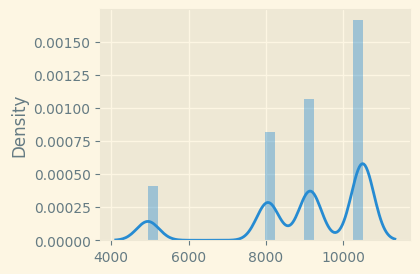

In [30]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(4, 3))
sns.distplot(SourceDestination_Transformer_dataframe.loc[:, ['source']])
plt.show()

Based on the plots, the data is not normally distributed, so using PowerTransformer would be more suitable than StandardScaler to handle the skewness and improve the data's distribution.

In [31]:
SourceDestination_Pipe = Pipeline(steps=[
    ("Grouper", RareLabelEncoder(tol=0.1,
                                n_categories=2,
                                replace_with="Other"
                               )),
    ("MeanEncoder", MeanEncoder()),
    ("Scalar", PowerTransformer())
])
SourceDestination_Pipe.fit_transform(SourceDestination, Y_Train)

,source,destination
0,1.040285,1.039038
1,-1.878057,-0.848449
2,-0.205899,-0.211326
3,1.040285,1.039038
4,1.040285,1.039038
...,...,...
6690,1.040285,1.039038
6691,-0.904774,-1.831073
6692,1.040285,1.039038
6693,-0.904774,-1.831073


In [32]:
def is_north(X):
    columns = X.columns.to_list()
    north_cities = ['Delhi', 'New Delhi', 'Kolkata']
    return(
        X
        .assign(**{
             f"{col}_is_north" : X[col].isin(north_cities).astype(int)
             for col in columns
        })
        .drop(columns=columns)
          # Dynamically renaming the column
    )
FunctionTransformer(func=is_north).fit_transform(SourceDestination)

,source_is_north,destination_is_north
0,1,0
1,0,0
2,1,0
3,1,0
4,1,0
...,...,...
6690,1,0
6691,0,1
6692,1,0
6693,0,1


In [33]:
SourceDestination_Transformer = FeatureUnion(transformer_list=[
    ("Part-1", SourceDestination_Pipe),
    ("Part-2", FunctionTransformer(func=is_north))
])
SourceDestination_Transformer.fit_transform(SourceDestination, Y_Train)

,source,destination,source_is_north,destination_is_north
0,1.040285,1.039038,1,0
1,-1.878057,-0.848449,0,0
2,-0.205899,-0.211326,1,0
3,1.040285,1.039038,1,0
4,1.040285,1.039038,1,0
...,...,...,...,...
6690,1.040285,1.039038,1,0
6691,-0.904774,-1.831073,0,1
6692,1.040285,1.039038,1,0
6693,-0.904774,-1.831073,0,1


#### FINAL

In [34]:
SourceDestination_Pipe = Pipeline(steps=[
    ("Grouper", RareLabelEncoder(tol=0.1,
                                n_categories=2,
                                replace_with="Other"
                               )),
    ("MeanEncoder", MeanEncoder()),
    ("Scalar", PowerTransformer())
])
SourceDestination_Pipe.fit_transform(SourceDestination, Y_Train)

def is_north(X):
    columns = X.columns.to_list()
    north_cities = ['Delhi', 'New Delhi', 'Kolkata']
    return(
        X
        .assign(**{
             f"{col}_is_north" : X[col].isin(north_cities).astype(int)
             for col in columns
        })
        .drop(columns=columns)
          # Dynamically renaming the column
    )
FunctionTransformer(func=is_north).fit_transform(SourceDestination)

SourceDestination_Transformer = FeatureUnion(transformer_list=[
    ("Part-1", SourceDestination_Pipe),
    ("Part-2", FunctionTransformer(func=is_north))
])
SourceDestination_Transformer.fit_transform(SourceDestination, Y_Train)

,source,destination,source_is_north,destination_is_north
0,1.040285,1.039038,1,0
1,-1.878057,-0.848449,0,0
2,-0.205899,-0.211326,1,0
3,1.040285,1.039038,1,0
4,1.040285,1.039038,1,0
...,...,...,...,...
6690,1.040285,1.039038,1,0
6691,-0.904774,-1.831073,0,1
6692,1.040285,1.039038,1,0
6693,-0.904774,-1.831073,0,1


### 4.4 DEPARTURE TIME AND ARRIVAL TIME

In [35]:
train['dep_time']

0       06:50:00
1       06:20:00
2       11:15:00
3       19:45:00
4       09:50:00
          ...   
6690    04:00:00
6691    09:30:00
6692    20:55:00
6693    16:55:00
6694    09:35:00
Name: dep_time, Length: 6695, dtype: object

In [36]:
train['arrival_time']

0       16:10:00
1       07:40:00
2       18:30:00
3       12:35:00
4       13:05:00
          ...   
6690    18:50:00
6691    12:20:00
6692    19:00:00
6693    19:55:00
6694    18:00:00
Name: arrival_time, Length: 6695, dtype: object

In [37]:
time_pipe_1 = Pipeline(steps=[
    ("DT", DatetimeFeatures(features_to_extract=['hour', 'minute'])),
    ("Scalar", MinMaxScaler())
])
time_pipe_1.fit_transform(X_Train.loc[:, ['dep_time', 'arrival_time']])

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute
0,0.260870,0.909091,0.695652,0.181818
1,0.260870,0.363636,0.304348,0.727273
2,0.478261,0.272727,0.782609,0.545455
3,0.826087,0.818182,0.521739,0.636364
4,0.391304,0.909091,0.565217,0.090909
...,...,...,...,...
6690,0.173913,0.000000,0.782609,0.909091
6691,0.391304,0.545455,0.521739,0.363636
6692,0.869565,1.000000,0.826087,0.000000
6693,0.695652,1.000000,0.826087,1.000000


In [38]:
def part_of_day(X, morning=4, noon=12, evening=16, night=20):
    columns = X.columns.to_list()
    X_Temp = X.assign(**{
        col: pd.to_datetime(X.loc[:, col]).dt.hour
        for col in columns
    })
    
    return(
        X_Temp
        .assign(**{
            f"{col}_part_of_day": np.select(
                [X_Temp.loc[:, col].between(morning, noon, inclusive='left'),
                 X_Temp.loc[:, col].between(noon, evening, inclusive='left'),
                 X_Temp.loc[:, col].between(evening, night, inclusive='left')],
                ['morning', 'afternoon' , 'evening'],
                default = 'night'
            )
            for col in columns
        })
        .drop(columns=columns)
    )
FunctionTransformer(func=part_of_day).fit_transform(X_Train.loc[:, ['dep_time', 'arrival_time']])

,dep_time_part_of_day,arrival_time_part_of_day
0,morning,evening
1,morning,morning
2,morning,evening
3,evening,afternoon
4,morning,afternoon
...,...,...
6690,morning,evening
6691,morning,afternoon
6692,night,evening
6693,evening,evening


In [39]:
time_pipe_2 = Pipeline(steps=[
    ("Part_of_Day", FunctionTransformer(func=part_of_day)),
    ("Encoder", CountFrequencyEncoder()),
    ("Scalar", MinMaxScaler())
    
])
time_pipe_2.fit_transform(X_Train.loc[:, ['dep_time', 'arrival_time']])

,dep_time_part_of_day,arrival_time_part_of_day
0,1.000000,0.654008
1,1.000000,0.855485
2,1.000000,0.654008
3,0.211834,0.000000
4,1.000000,0.000000
...,...,...
6690,1.000000,0.654008
6691,1.000000,0.000000
6692,0.139115,0.654008
6693,0.211834,0.654008


#### FINAL

In [40]:
ArrivalDepartureTime_Transformer = FeatureUnion(transformer_list=[
    ("Part_1", time_pipe_1),
    ("Part_2", time_pipe_2)
])
ArrivalDepartureTime_Transformer.fit_transform(X_Train.loc[:, ['dep_time', 'arrival_time']], Y_Train)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute,dep_time_part_of_day,arrival_time_part_of_day
0,0.260870,0.909091,0.695652,0.181818,1.000000,0.654008
1,0.260870,0.363636,0.304348,0.727273,1.000000,0.855485
2,0.478261,0.272727,0.782609,0.545455,1.000000,0.654008
3,0.826087,0.818182,0.521739,0.636364,0.211834,0.000000
4,0.391304,0.909091,0.565217,0.090909,1.000000,0.000000
...,...,...,...,...,...,...
6690,0.173913,0.000000,0.782609,0.909091,1.000000,0.654008
6691,0.391304,0.545455,0.521739,0.363636,1.000000,0.000000
6692,0.869565,1.000000,0.826087,0.000000,0.139115,0.654008
6693,0.695652,1.000000,0.826087,1.000000,0.211834,0.654008


### 4.5 DURATION

In [41]:
train['duration']

0        560
1         80
2        435
3       1010
4        195
        ... 
6690     890
6691     170
6692    1325
6693     180
6694     505
Name: duration, Length: 6695, dtype: int64

In [42]:

Duration_Transformer = Pipeline(steps=[
    ("Outlier", Winsorizer(capping_method='iqr', fold=1.5)),
    ('Imputer', SimpleImputer(strategy='median')),
    ("scalar", PowerTransformer())
])
Duration_Transformer.fit_transform(X_Train.loc[:, ['duration']])

,duration
0,0.242156
1,-1.777309
2,-0.043462
3,0.938128
4,-0.903335
...,...
6690,0.785363
6691,-1.043363
6692,1.272623
6693,-0.985271


### 4.6 TOTAL STOPS

In [43]:
train['total_stops'].value_counts(normalize=True)

total_stops
1.0    0.540702
0.0    0.332188
2.0    0.123376
3.0    0.003585
4.0    0.000149
Name: proportion, dtype: float64

In [44]:

def is_direct(X):
    return X.assign(
        is_direct_flight = X.total_stops.eq(0).astype(int))


#### FINAL

In [45]:

def is_direct(X):
    return X.assign(
        is_direct_flight = X.total_stops.eq(0).astype(int))

TotalStop_Transformer = Pipeline(steps=[
    ("Imputer", SimpleImputer(strategy='most_frequent')),
    ("isDirectFlight", FunctionTransformer(func=is_direct))
])
TotalStop_Transformer.fit_transform(X_Train.loc[:, ['total_stops']])

,total_stops,is_direct_flight
0,1.0,0
1,0.0,1
2,1.0,0
3,1.0,0
4,0.0,1
...,...,...
6690,1.0,0
6691,0.0,1
6692,1.0,0
6693,0.0,1


### 4.7 ADDITIONAL INFO

In [46]:
train['additional_info'].value_counts(normalize=True)

additional_info
No Info                         0.782375
In-flight meal not included     0.183420
No check-in baggage included    0.030919
1 Long layover                  0.001942
Change airports                 0.000896
1 Short layover                 0.000149
Business class                  0.000149
2 Long layover                  0.000149
Name: proportion, dtype: float64

In [47]:
AdditionalInfo_Transformation = Pipeline(steps=[
    ("Grouper", RareLabelEncoder(tol=0.2, n_categories=2, replace_with='Info')),
    ("Encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])
AdditionalInfo_Transformation.fit_transform(X_Train.loc[:, ['additional_info']])

,additional_info_Info,additional_info_No Info
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
6690,0.0,1.0
6691,1.0,0.0
6692,0.0,1.0
6693,0.0,1.0


### 4.8 CLASS

In [49]:
train['class_'].value_counts(normalize=True)

class_
Economy            0.997909
Premium economy    0.001643
Business           0.000448
Name: proportion, dtype: float64

In [51]:
Class_Transformer = Pipeline(steps=[
    ("Encoder", OneHotEncoder(sparse_output=False, handle_unknown='ignore' ))
])
Class_Transformer.fit_transform(X_Train.loc[:, ['class_']])

,class__Business,class__Economy,class__Premium economy
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
6690,0.0,1.0,0.0
6691,0.0,1.0,0.0
6692,0.0,1.0,0.0
6693,0.0,1.0,0.0


### 5. COLUMN TRANSFORMER

In [53]:
Column_Transformer = ColumnTransformer(transformers=[
    ("Airline", Airline_Transformer, ['airline']),
    ("DOJ", DOJ_Transformer, ['date_of_journey']),
    ("Location", SourceDestination_Transformer, ["source", 'destination']),
    ("Time", ArrivalDepartureTime_Transformer, ["dep_time", "arrival_time"]),
    ("Duration", Duration_Transformer, ['duration']),
    ("Stops", TotalStop_Transformer, ['total_stops']),
    ("Info", AdditionalInfo_Transformation, ['additional_info']),
    ("Class", Class_Transformer, ['class_'])
], remainder='passthrough')
Column_Transformer.fit_transform(X_Train, Y_Train)

,Airline__airline_Air India,Airline__airline_Indigo,Airline__airline_Jet Airways,Airline__airline_Multiple Carriers,Airline__airline_Other,DOJ__date_of_journey_month,DOJ__date_of_journey_week,DOJ__date_of_journey_day_of_week,DOJ__date_of_journey_day_of_month,Location__source,Location__destination,Location__source_is_north,Location__destination_is_north,Time__dep_time_hour,Time__dep_time_minute,Time__arrival_time_hour,Time__arrival_time_minute,Time__dep_time_part_of_day,Time__arrival_time_part_of_day,Duration__duration,Stops__total_stops,Stops__is_direct_flight,Info__additional_info_Info,Info__additional_info_No Info,Class__class__Business,Class__class__Economy,Class__class__Premium economy
0,0.0,1.0,0.0,0.0,0.0,0.666667,0.588235,0.500000,0.307692,1.040285,1.039038,1,0,0.260870,0.909091,0.695652,0.181818,1.000000,0.654008,0.242156,1.0,0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.333333,0.294118,0.333333,0.076923,-1.878057,-0.848449,0,0,0.260870,0.363636,0.304348,0.727273,1.000000,0.855485,-1.777309,0.0,1,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.666667,0.647059,0.333333,0.538462,-0.205899,-0.211326,1,0,0.478261,0.272727,0.782609,0.545455,1.000000,0.654008,-0.043462,1.0,0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.000000,0.823529,1.000000,0.307692,1.040285,1.039038,1,0,0.826087,0.818182,0.521739,0.636364,0.211834,0.000000,0.938128,1.0,0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.000000,0.941176,0.166667,0.653846,1.040285,1.039038,1,0,0.391304,0.909091,0.565217,0.090909,1.000000,0.000000,-0.903335,0.0,1,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,1.000000,0.076923,1.040285,1.039038,1,0,0.173913,0.000000,0.782609,0.909091,1.000000,0.654008,0.785363,1.0,0,0.0,1.0,0.0,1.0,0.0
6691,0.0,0.0,0.0,0.0,1.0,0.666667,0.764706,0.000000,1.000000,-0.904774,-1.831073,0,1,0.391304,0.545455,0.521739,0.363636,1.000000,0.000000,-1.043363,0.0,1,1.0,0.0,0.0,1.0,0.0
6692,0.0,0.0,1.0,0.0,0.0,1.000000,0.823529,0.500000,0.192308,1.040285,1.039038,1,0,0.869565,1.000000,0.826087,0.000000,0.139115,0.654008,1.272623,1.0,0,0.0,1.0,0.0,1.0,0.0
6693,0.0,1.0,0.0,0.0,0.0,0.333333,0.411765,1.000000,0.769231,-0.904774,-1.831073,0,1,0.695652,1.000000,0.826087,1.000000,0.211834,0.654008,-0.985271,0.0,1,0.0,1.0,0.0,1.0,0.0


### 6. FEATURE SELECTION

In [55]:
estimator = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)

selector = SelectBySingleFeaturePerformance(
    estimator=estimator,
    scoring="r2",
    threshold=0.1
) 
selector

SelectBySingleFeaturePerformance(estimator=RandomForestRegressor(max_depth=3,
                                                                 n_estimators=10,
                                                                 random_state=42),
                                 scoring='r2', threshold=0.1)

In [56]:
estimator = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)

selector = SelectBySingleFeaturePerformance(
    estimator=estimator,
    scoring="r2",
    threshold=0.05
)

preprocessor = Pipeline(steps=[
    ("ct", Column_Transformer),  
    ("selector", selector)
])

X_Train_transformed = preprocessor.fit_transform(X_Train, Y_Train)


In [57]:
X_Train_transformed

,Airline__airline_Indigo,Airline__airline_Jet Airways,Airline__airline_Other,DOJ__date_of_journey_month,DOJ__date_of_journey_week,Location__source,Location__destination,Location__source_is_north,Time__arrival_time_hour,Duration__duration,Stops__total_stops,Stops__is_direct_flight
0,1.0,0.0,0.0,0.666667,0.588235,1.040285,1.039038,1,0.695652,0.242156,1.0,0
1,0.0,0.0,0.0,0.333333,0.294118,-1.878057,-0.848449,0,0.304348,-1.777309,0.0,1
2,0.0,0.0,1.0,0.666667,0.647059,-0.205899,-0.211326,1,0.782609,-0.043462,1.0,0
3,0.0,1.0,0.0,1.000000,0.823529,1.040285,1.039038,1,0.521739,0.938128,1.0,0
4,0.0,1.0,0.0,1.000000,0.941176,1.040285,1.039038,1,0.565217,-0.903335,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6690,0.0,0.0,0.0,0.000000,0.000000,1.040285,1.039038,1,0.782609,0.785363,1.0,0
6691,0.0,0.0,1.0,0.666667,0.764706,-0.904774,-1.831073,0,0.521739,-1.043363,0.0,1
6692,0.0,1.0,0.0,1.000000,0.823529,1.040285,1.039038,1,0.826087,1.272623,1.0,0
6693,1.0,0.0,0.0,0.333333,0.411765,-0.904774,-1.831073,0,0.826087,-0.985271,0.0,1


In [58]:
feature_performances = preprocessor.named_steps["selector"].feature_performance_
feature_performances

{'Airline__airline_Air India': 0.0016074554567594805,
 'Airline__airline_Indigo': 0.1252999353738958,
 'Airline__airline_Jet Airways': 0.17730525684106338,
 'Airline__airline_Multiple Carriers': 0.022727480799496935,
 'Airline__airline_Other': 0.11775706254865019,
 'DOJ__date_of_journey_month': 0.08865450726236464,
 'DOJ__date_of_journey_week': 0.18651313814579565,
 'DOJ__date_of_journey_day_of_week': 0.004695352540117177,
 'DOJ__date_of_journey_day_of_month': 0.02932648453815201,
 'Location__source': 0.13379346916321913,
 'Location__destination': 0.13360305665133332,
 'Location__source_is_north': 0.08800007718207437,
 'Location__destination_is_north': 0.033209358933063204,
 'Time__dep_time_hour': 0.012853357737425316,
 'Time__dep_time_minute': 0.03465520409357133,
 'Time__arrival_time_hour': 0.0693979290733256,
 'Time__arrival_time_minute': 0.039842868635348694,
 'Time__dep_time_part_of_day': -0.0003950432703676565,
 'Time__arrival_time_part_of_day': 0.02723368470197311,
 'Duration__d

In [59]:

sorted_feat_imp = dict(sorted(feature_performances.items(), key=lambda val: val[1]))
sorted_feat_imp

{'Info__additional_info_Info': -0.00044848324687762897,
 'Info__additional_info_No Info': -0.00044848324687762897,
 'Class__class__Premium economy': -0.00039800111930325216,
 'Time__dep_time_part_of_day': -0.0003950432703676565,
 'Airline__airline_Air India': 0.0016074554567594805,
 'DOJ__date_of_journey_day_of_week': 0.004695352540117177,
 'Class__class__Economy': 0.006077300761560729,
 'Time__dep_time_hour': 0.012853357737425316,
 'Airline__airline_Multiple Carriers': 0.022727480799496935,
 'Time__arrival_time_part_of_day': 0.02723368470197311,
 'DOJ__date_of_journey_day_of_month': 0.02932648453815201,
 'Location__destination_is_north': 0.033209358933063204,
 'Time__dep_time_minute': 0.03465520409357133,
 'Time__arrival_time_minute': 0.039842868635348694,
 'Class__class__Business': 0.04082094709137037,
 'Time__arrival_time_hour': 0.0693979290733256,
 'Location__source_is_north': 0.08800007718207437,
 'DOJ__date_of_journey_month': 0.08865450726236464,
 'Airline__airline_Other': 0.1177

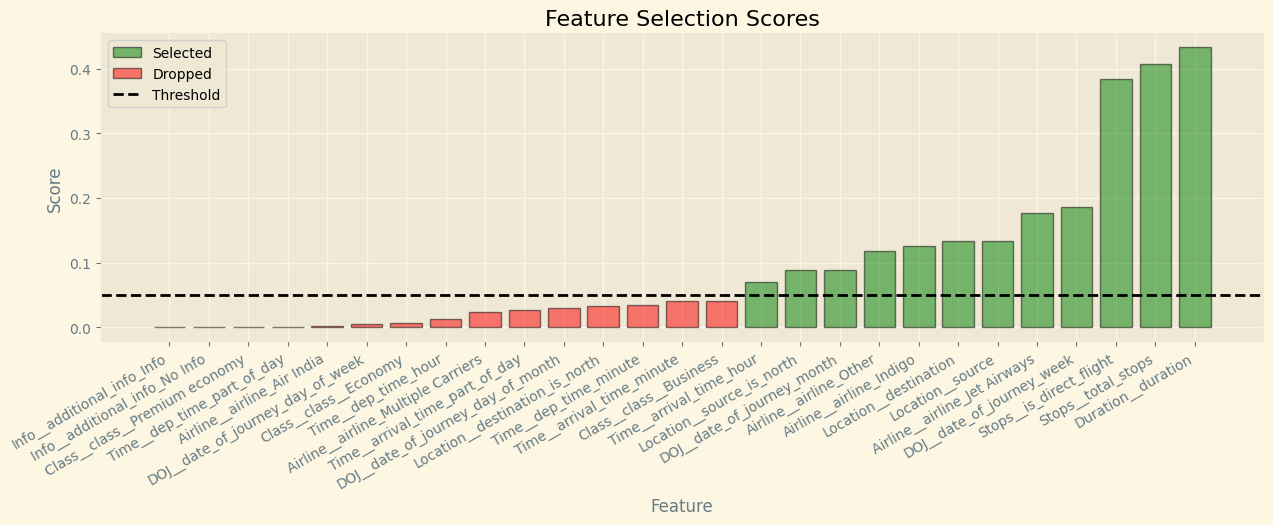

In [60]:
THRESHOLD = 0.05

selected_bar = None
dropped_bar = None
colors = ["red" if score < THRESHOLD else "green" for score in sorted_feat_imp.values()]


fig, ax = plt.subplots(figsize=(15, 4)) 

for i, (feature, score) in enumerate(sorted_feat_imp.items()):
    params = dict(
        x=i,
        height=score,
        edgecolor="black",
        alpha=0.5
    )
    
    if score < THRESHOLD:
        bar = ax.bar(
            color="red",
            **params
        )
        if not dropped_bar:
            dropped_bar = bar[0]
    else:
        bar = ax.bar(
            color="green",
            **params
        )
        if not selected_bar:
            selected_bar = bar[0]

thresh_line = ax.axhline(
    y=0.05,
    color="black",
    linestyle="--"
)

ax.set_xticks(
    ticks=range(len(sorted_feat_imp)),
    labels=list(sorted_feat_imp.keys()),
    rotation=30,
    ha="right"
)

ax.set(
    xlabel="Feature",
    ylabel="Score",
    title="Feature Selection Scores"
)

ax.legend(
    handles=[selected_bar, dropped_bar, thresh_line],
    labels=["Selected", "Dropped", "Threshold"],
    loc="upper left"
)

plt.show()